In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# What characteristics define a perfectly healthy individual?

In [104]:
df=pd.read_csv("heart1.csv")
print(df.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Income        BMI Triglycerides  \
0               0        1        0  ...  261404  31.251233           286   
1               1        1        1  ...  285768  27.194973           235   
2               0        0        0  ...  235282  28.176571           587   
3               1        1        0  ...  125640  36.464704           378   
4               1        1        1  ...  160555  21.809144           231   

   Physical Activity Days Per Week  Sleep Hours Per Day    Cou

In [105]:
#no of column no of row
print(df.info())
print(df.shape)
print(df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## check any null value

In [132]:
df = df.drop(columns=['Unnamed: 25'])

print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


### check any duplicate

In [107]:

print(df.duplicated().sum())


0


### check outlier
### summary statistic help to check any outlier values in a column
### column which  lot of difference between minimum values and maximum value the outlier will present
### min and max: If there's a big gap between them, check for outliers.
### 25%, 50%, 75%: These are quartiles. If the max is far above 75% (or min far below 25%), it's a sign of potential outliers.

# To check any outlier present in column
### 1.summary statistic help to check any outlier values in a column
### 2.column which  lot of difference between minimum values and maximum value the outlier will present
### 3.min and max: If there's a big gap between them, check for outliers.
### 4.25%, 50%, 75%: These are quartiles. If the max is far above 75% (or min far below 25%), it's a sign of potential outliers.

In [108]:

print(df.describe())
#all columns except dist code year state code must contain outlier

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

### To check outlier use boxplot to check outlier

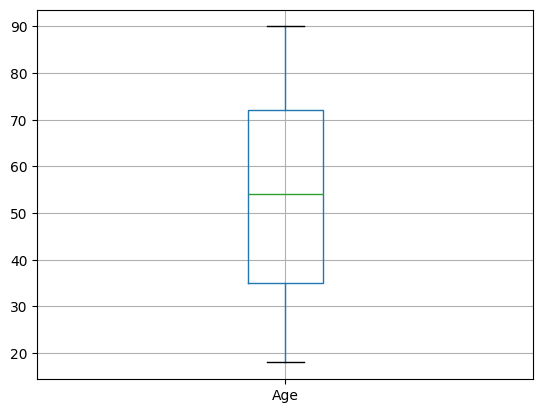

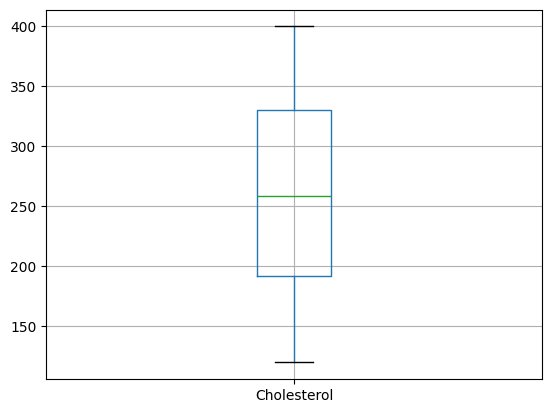

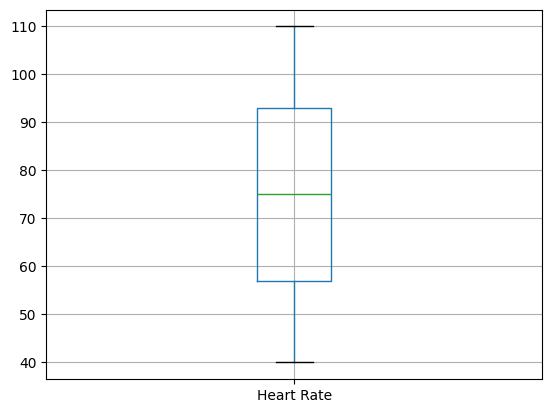

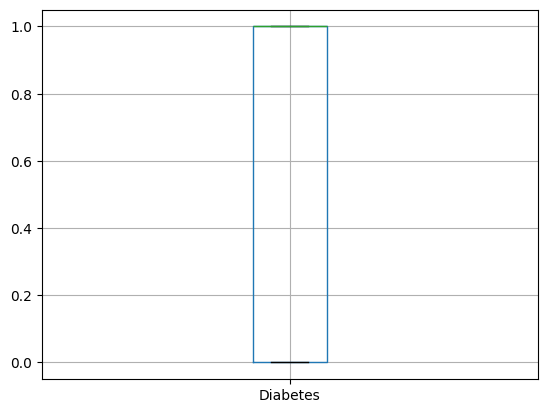

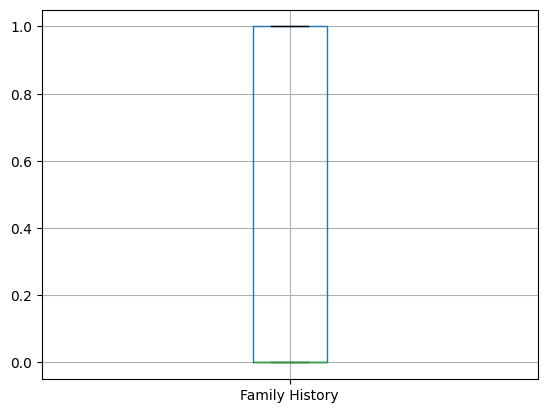

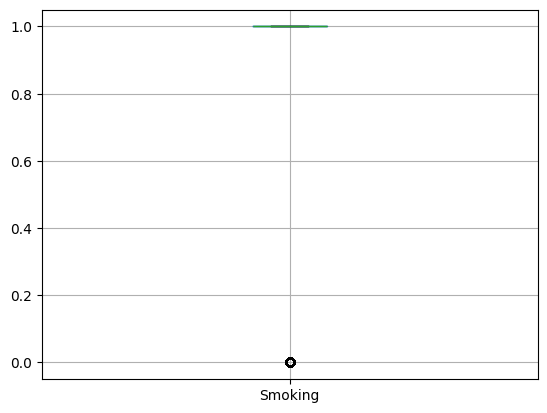

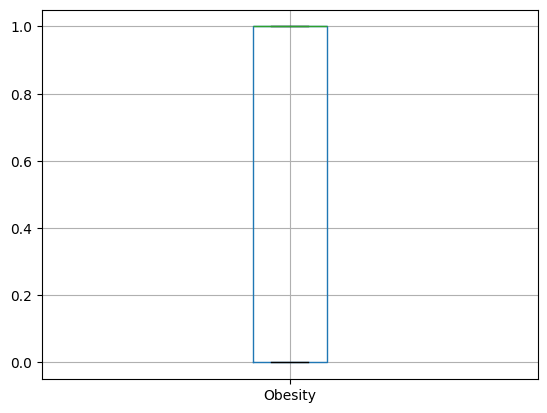

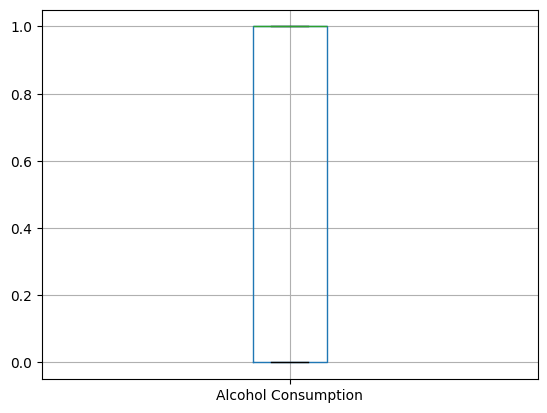

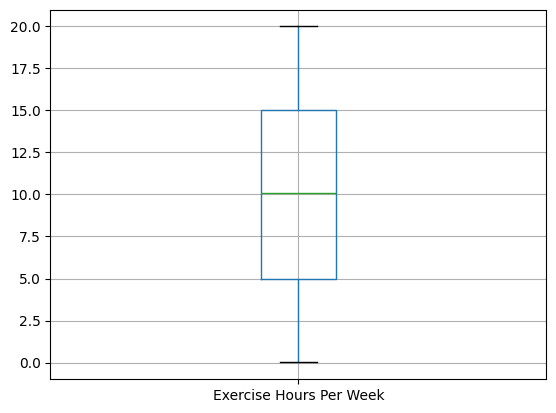

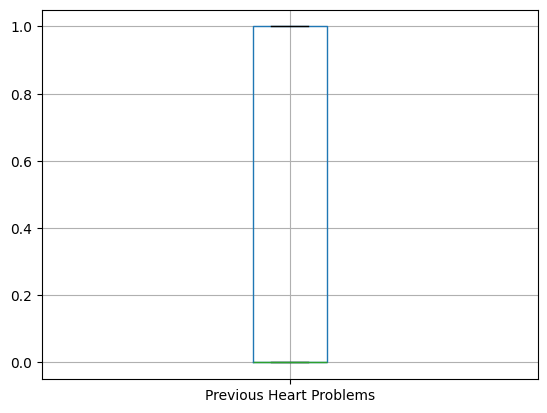

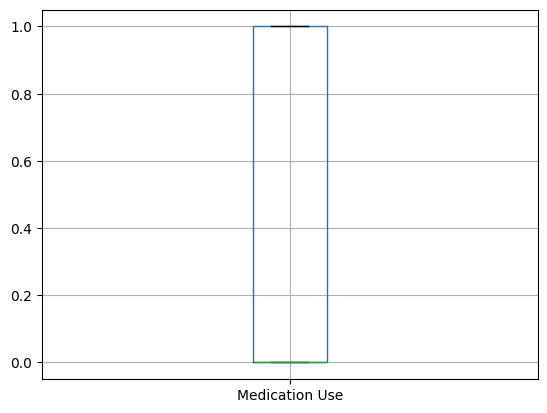

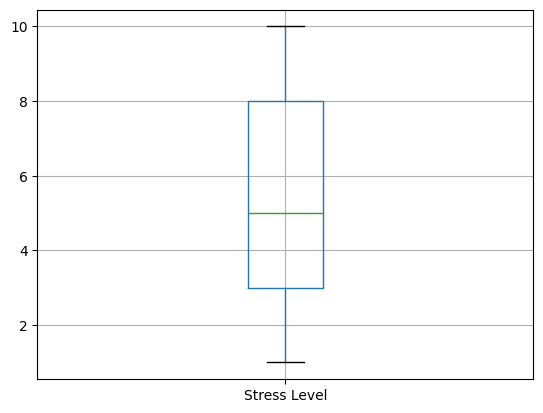

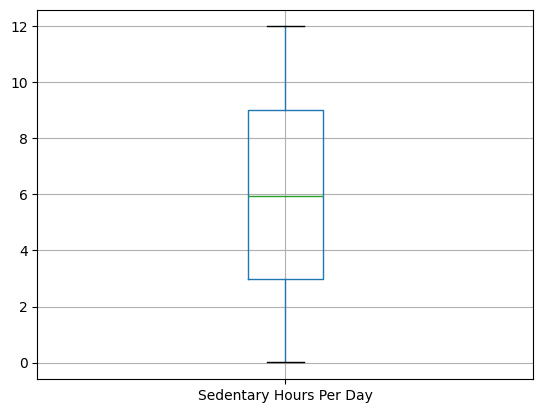

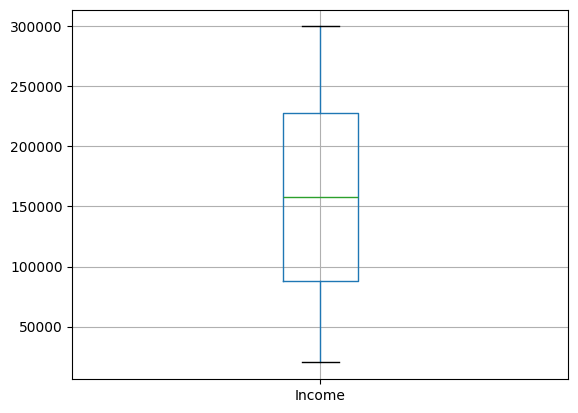

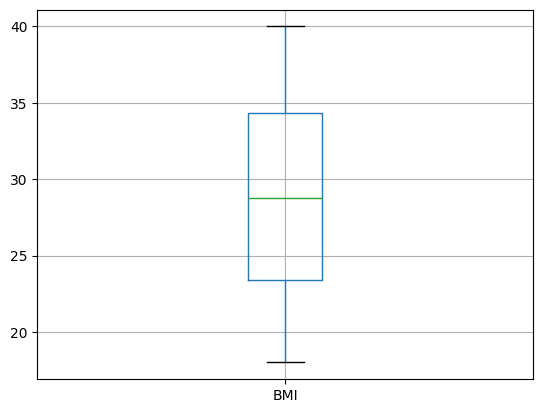

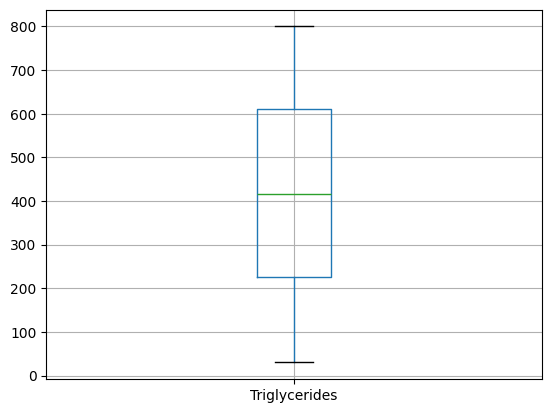

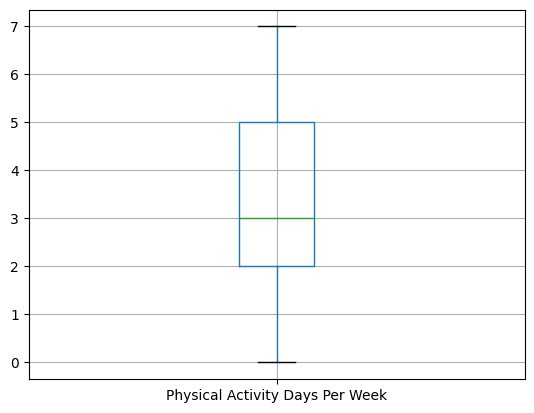

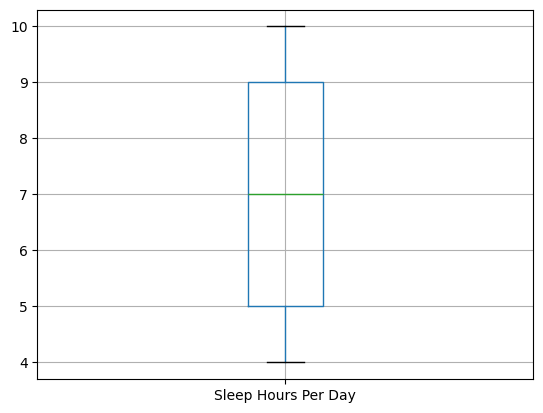

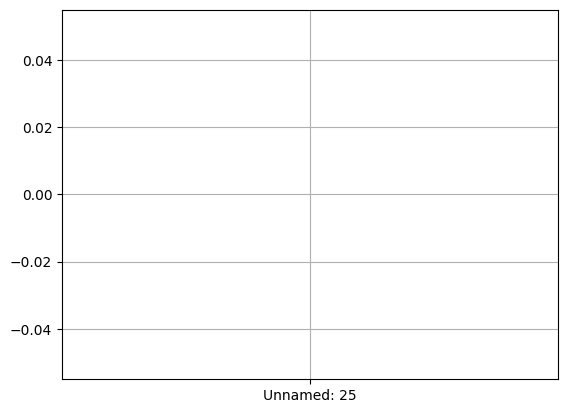

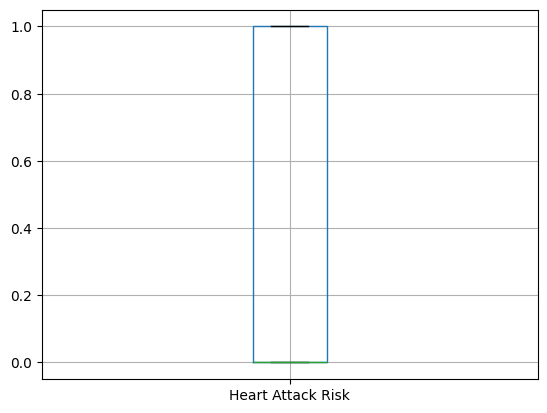

In [109]:

# Step 1: Filter only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Choose top 75 (or however many you need)
#outlier_columns = numeric_cols[:75]



for i, n_col in enumerate(numeric_cols):
    df.boxplot(column=n_col)
    plt.show()


In [110]:
q1=df['Age'].quantile(0.25)
q2=df['Age'].quantile(0.75)
iqr=q2-q1
lower=q1-1.5*iqr
upper=q2+1.5*iqr
outlier=df.loc[(df['Age']>upper)|(df['Age']<lower)]
print(len(outlier))

0


## check outlier in each column

In [62]:

numeric_col=df.select_dtypes(include='number').columns
for col in numeric_col:
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.75)
    iqr=q2-q1
    lower=q1-1.5*iqr
    upper=q2+1.5*iqr
    outlier=df.loc[(df[col]>upper)|(df[col]<lower)]
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outlier)}")


Column: Age
Number of outliers: 0

Column: Cholesterol
Number of outliers: 0

Column: Heart Rate
Number of outliers: 0

Column: Diabetes
Number of outliers: 0

Column: Family History
Number of outliers: 0

Column: Smoking
Number of outliers: 904

Column: Obesity
Number of outliers: 0

Column: Alcohol Consumption
Number of outliers: 0

Column: Exercise Hours Per Week
Number of outliers: 0

Column: Previous Heart Problems
Number of outliers: 0

Column: Medication Use
Number of outliers: 0

Column: Stress Level
Number of outliers: 0

Column: Sedentary Hours Per Day
Number of outliers: 0

Column: Income
Number of outliers: 0

Column: BMI
Number of outliers: 0

Column: Triglycerides
Number of outliers: 0

Column: Physical Activity Days Per Week
Number of outliers: 0

Column: Sleep Hours Per Day
Number of outliers: 0

Column: Unnamed: 25
Number of outliers: 0

Column: Heart Attack Risk
Number of outliers: 0


## Remove outlier in Smoking column
### We can remove outliers by using 
### 1.Z score method
### 2.IQR(Inter Quartile Range)
### 3.Clapping method: it replace the outlier with its nearest value

In [63]:

for col in numeric_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr


    df.loc[df[col] > upper, col] = upper
    df.loc[df[col] < lower, col] = lower

for col in numeric_col:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outlier=df.loc[(df[col]>upper)|(df[col]<lower)]
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outlier)}")

    


Column: Age
Number of outliers: 0

Column: Cholesterol
Number of outliers: 0

Column: Heart Rate
Number of outliers: 0

Column: Diabetes
Number of outliers: 0

Column: Family History
Number of outliers: 0

Column: Smoking
Number of outliers: 0

Column: Obesity
Number of outliers: 0

Column: Alcohol Consumption
Number of outliers: 0

Column: Exercise Hours Per Week
Number of outliers: 0

Column: Previous Heart Problems
Number of outliers: 0

Column: Medication Use
Number of outliers: 0

Column: Stress Level
Number of outliers: 0

Column: Sedentary Hours Per Day
Number of outliers: 0

Column: Income
Number of outliers: 0

Column: BMI
Number of outliers: 0

Column: Triglycerides
Number of outliers: 0

Column: Physical Activity Days Per Week
Number of outliers: 0

Column: Sleep Hours Per Day
Number of outliers: 0

Column: Unnamed: 25
Number of outliers: 0

Column: Heart Attack Risk
Number of outliers: 0


C:\Users\admin\AppData\Local\Temp\ipykernel_7900\2885033268.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '127.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper, col] = upper
C:\Users\admin\AppData\Local\Temp\ipykernel_7900\2885033268.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper, col] = upper
C:\Users\admin\AppData\Local\Temp\ipykernel_7900\2885033268.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper, col] = upper
C:\Users\admin\Ap

## All outlier removed

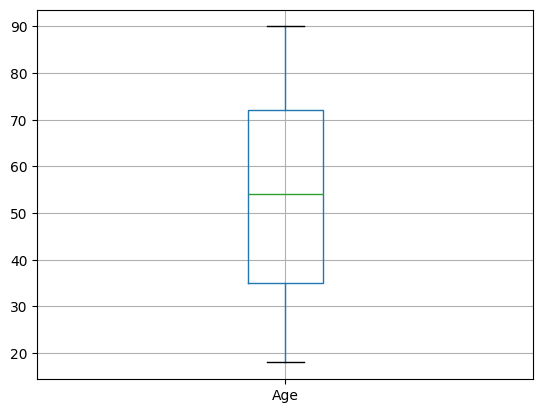

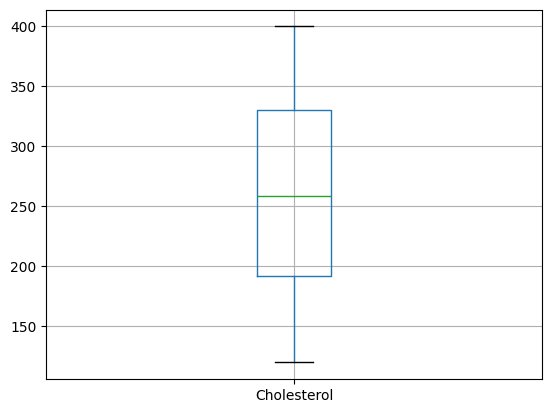

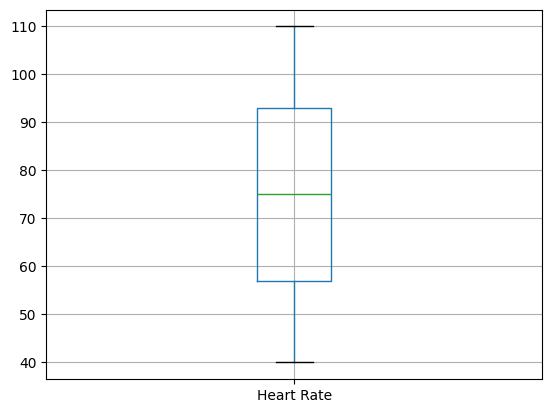

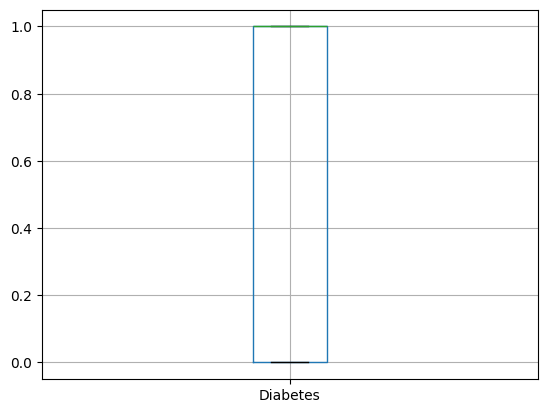

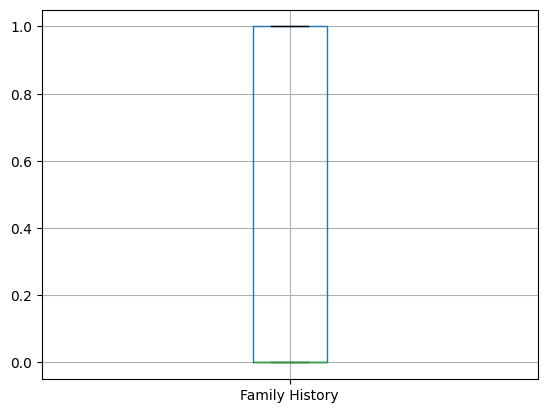

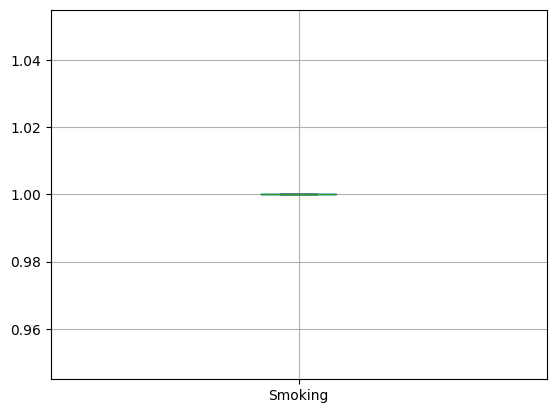

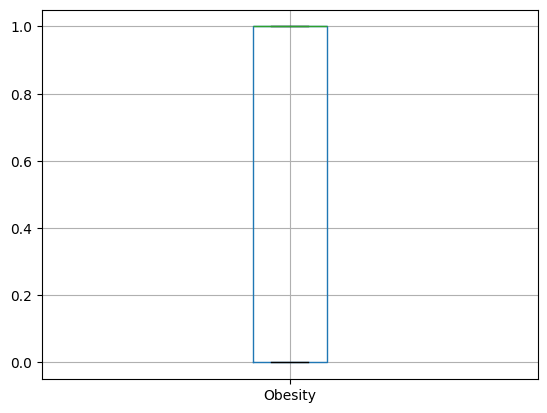

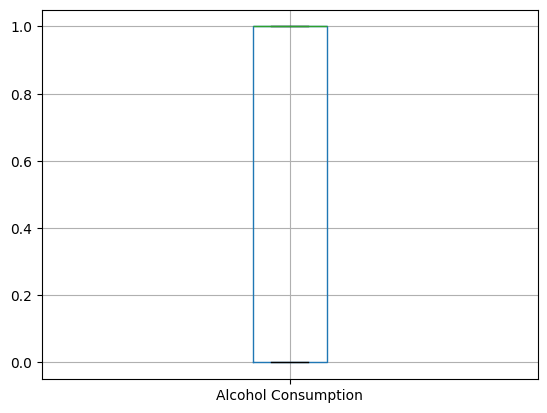

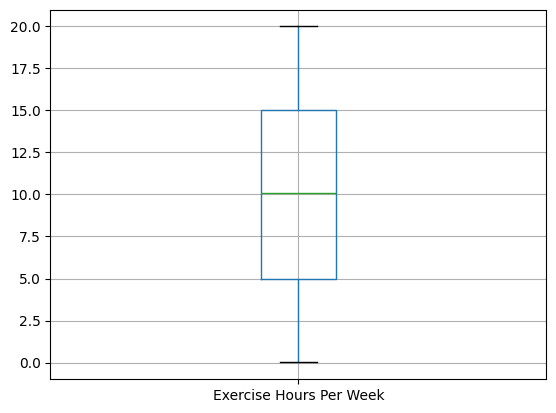

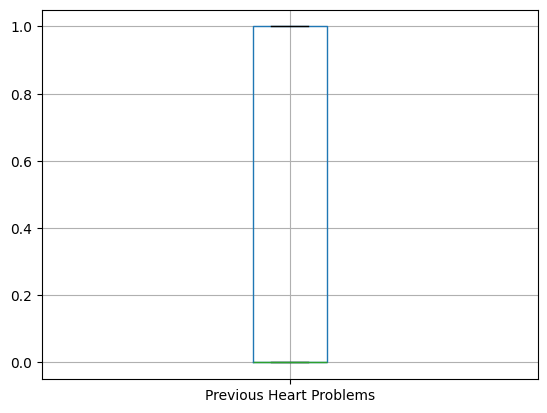

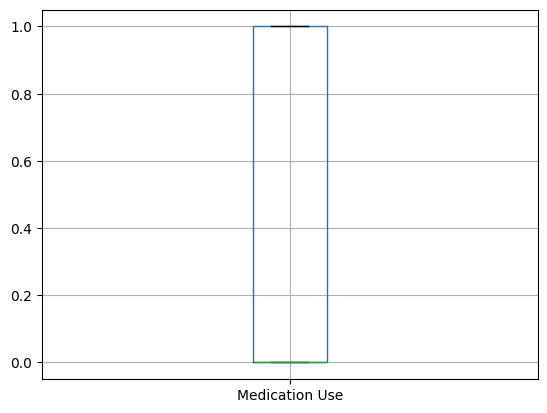

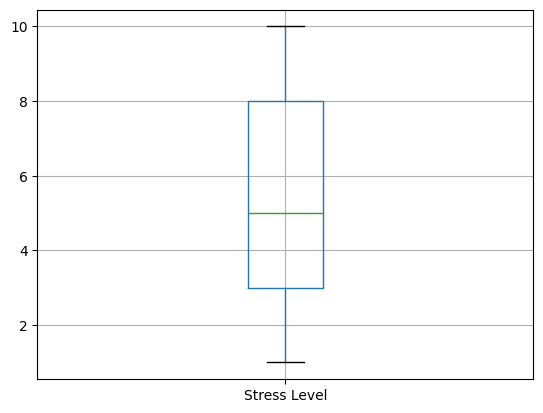

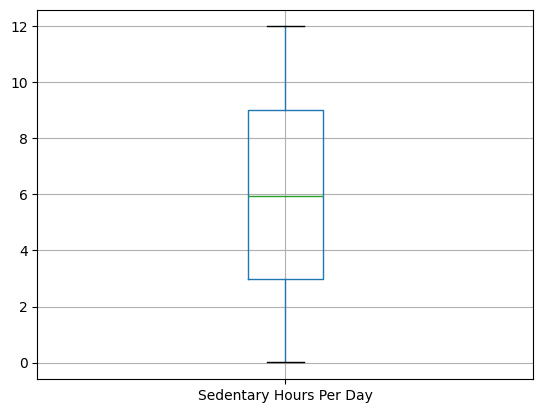

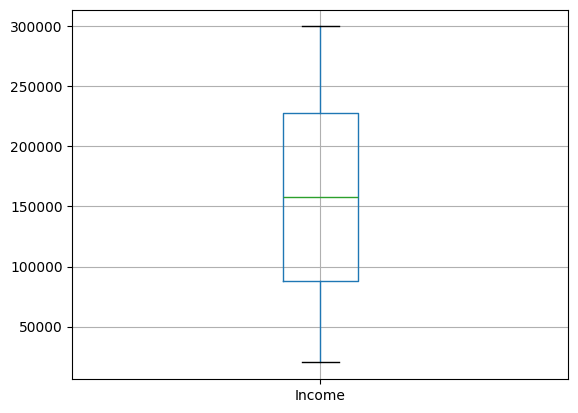

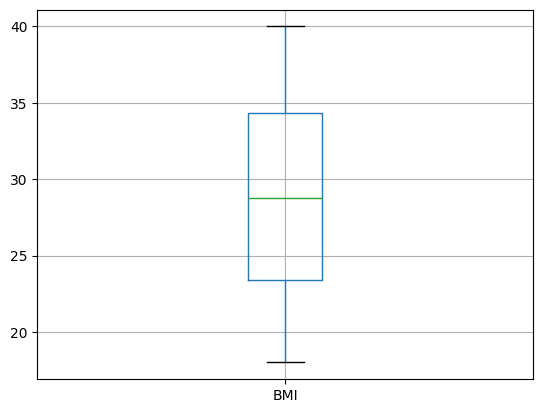

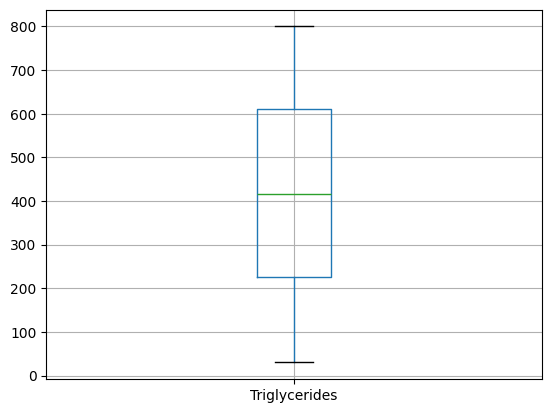

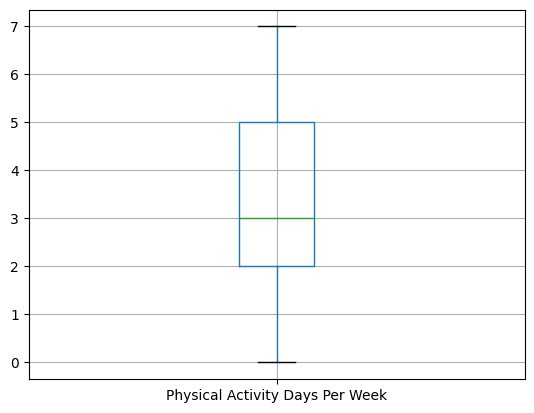

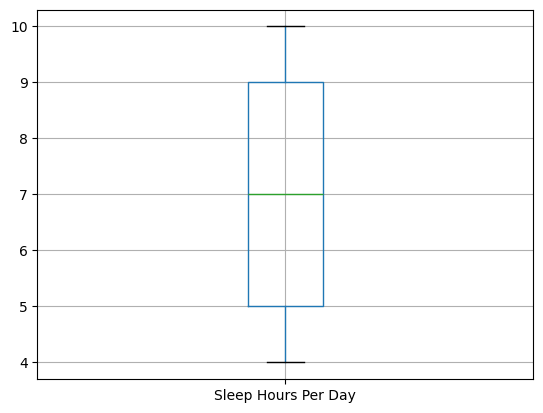

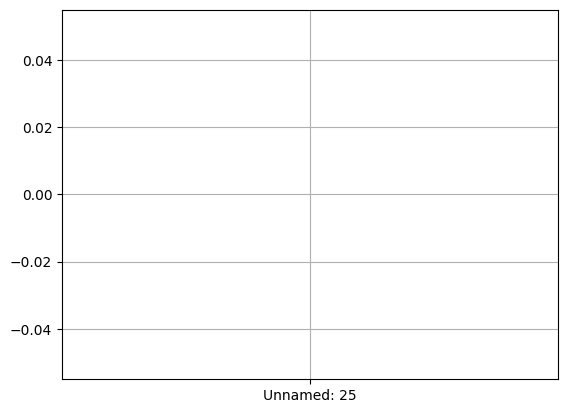

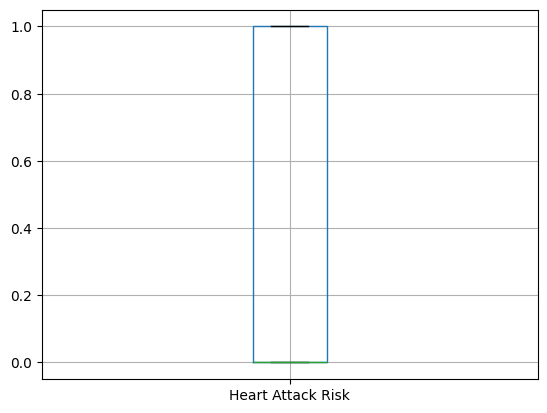

In [64]:

numeric_cols = df.select_dtypes(include='number').columns
for i, n_col in enumerate(numeric_cols):
    df.boxplot(column=n_col)
    plt.show()

## Exploratory Data Analysis

In [65]:

#total patient in each continent
total_people=df.groupby("Continent")["Patient ID"].count()
print(total_people)


Continent
Africa            873
Asia             2543
Australia         884
Europe           2241
North America     860
South America    1362
Name: Patient ID, dtype: int64


In [66]:
#total patient in each country
total=df.groupby("Country")["Patient ID"].count()
print(total.sort_values(ascending=False))

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
Vietnam           425
South Africa      425
United States     420
India             412
South Korea       409
Name: Patient ID, dtype: int64


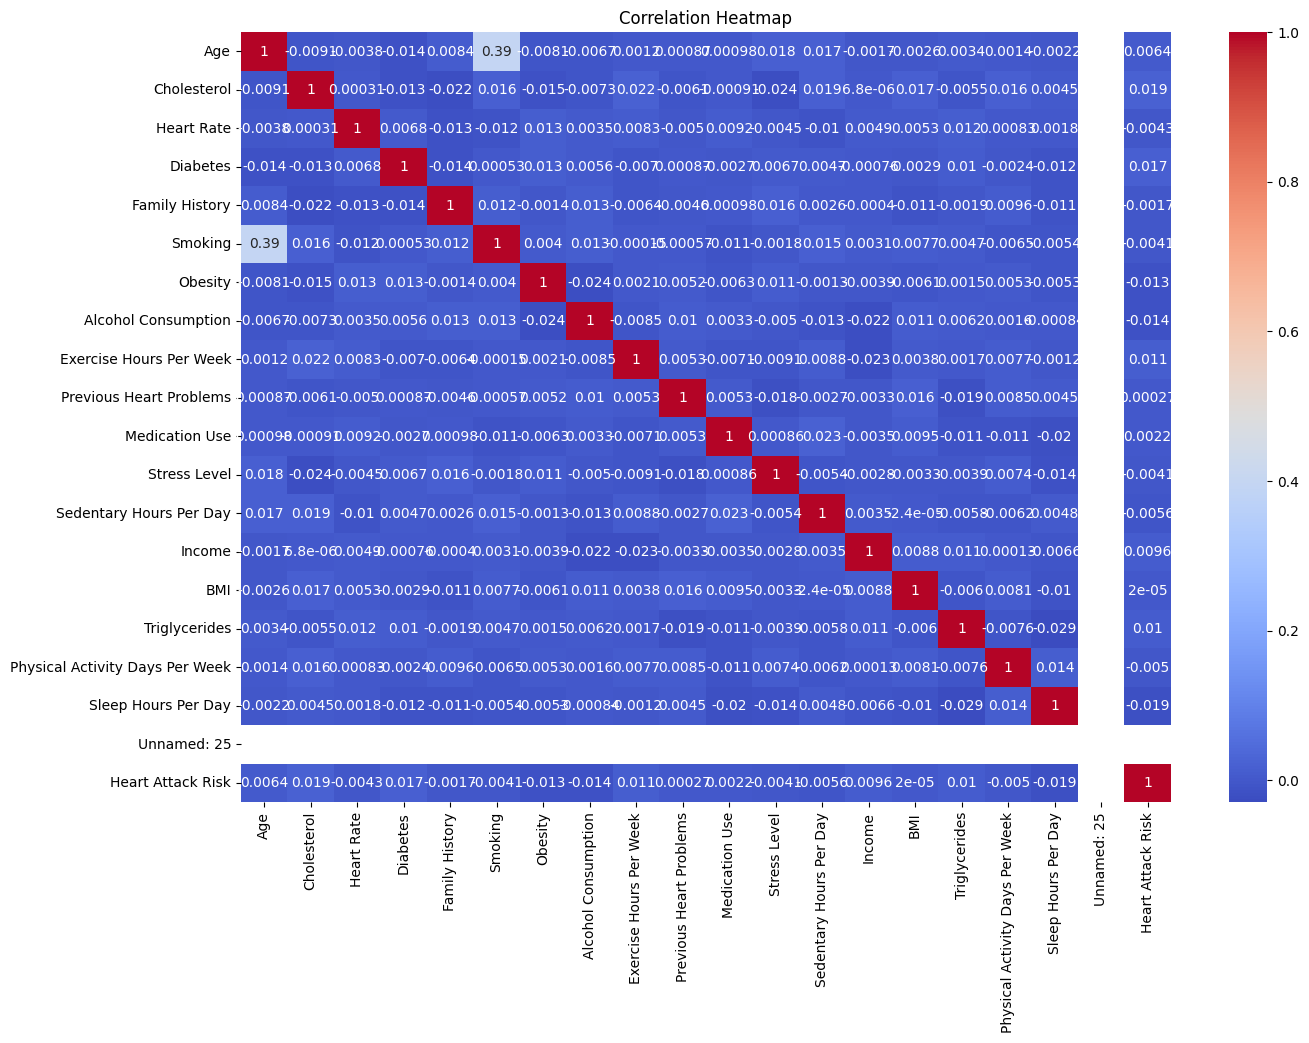

In [115]:
numeric=df.select_dtypes(include='number')
correlation=numeric.corr()

plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm')  
plt.title('Correlation Heatmap')
plt.show()

Sex
Female    2652
Male      6111
Name: Smoking, dtype: int64


Text(0.5, 1.0, 'Total Smokers by Gender')

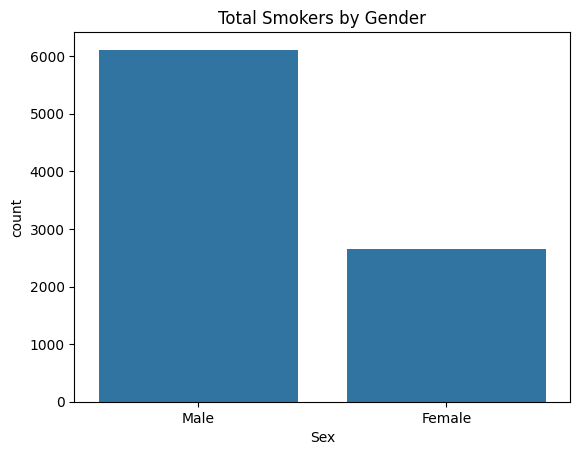

In [67]:
#total smoking person male female
count=df[df['Smoking']==1].groupby('Sex')['Smoking'].count()
print(count)
sns.countplot(x='Sex', data=df)
plt.title("Total Smokers by Gender")

0.018306645661318687


Text(0, 0.5, 'Stress Level')

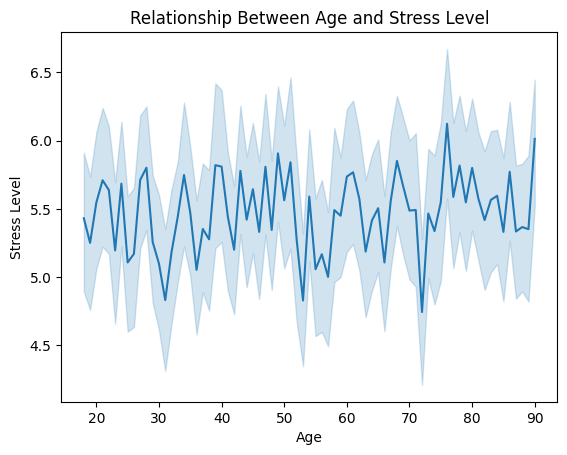

In [68]:
#Relation between Age column Stress column
#Age and Stress has no relation
#Very weak positive linear relationship.It's not strong enough to say "as age increases, stress also increases"
corr=df['Age'].corr(df['Stress Level'])
print(corr)
sns.lineplot(x='Age', y='Stress Level', data=df)
plt.title("Relationship Between Age and Stress Level")
plt.xlabel("Age")
plt.ylabel("Stress Level")

In [69]:
#Create a new column BP range Blood Pressure Range
df["BP range"]=df['Blood Pressure'].apply(lambda x: round(eval(x), 2))
def applybp(r):
    if r<1.2:
        return 'low'
    elif r>1.2 and r<1.6:
        return 'medium'
    else:
        return 'high'

df['BP range']=df['BP range'].apply(applybp)


In [70]:
age=df.groupby(['Sex','Smoking','BP range'])['Exercise Hours Per Week'].count()
display(age)

Sex     Smoking  BP range
Female  1        high        1320
                 low          428
                 medium       904
Male    1        high        3030
                 low          993
                 medium      2088
Name: Exercise Hours Per Week, dtype: int64

## Cholosterol level of each group

In [71]:
#Cholosterol level of each group
bins = [0, 29, 39, 49, 59, 69, 120]  # Customize as needed
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
average = df.groupby('AgeGroup')['Cholesterol'].mean()
print(average)

AgeGroup
<30      259.930403
30-39    263.412044
40-49    258.459848
50-59    258.903283
60-69    259.309504
70+      259.468593
Name: Cholesterol, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_7900\998015979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average = df.groupby('AgeGroup')['Cholesterol'].mean()


## Add one column Perfectly_Healthy for healthy or unhealthy

In [72]:
#add one column Perfectly_Healthy for healthy or unhealthy
df['Perfectly_Healthy'] = (
    (df['Diabetes'] == 0) &
    (df['Obesity'] == 0) &
    (df['BMI'] >= 18.5) & (df['BMI'] <= 24.9) &
    (df['Stress Level'] < 5) &
    (df['Exercise Hours Per Week'] >= 3) &
    (df['Sleep Hours Per Day'] >= 7) & (df['Sleep Hours Per Day'] <= 9) &
    (df['Cholesterol'] < 200) &
    (df['Triglycerides'] < 150) &
    (df['Previous Heart Problems'] == 0)
).astype(int)


## Only 1 person was healthy 8762 person unhealthy

In [73]:
# What % of people are perfectly healthy
total=df.groupby('Perfectly_Healthy')['Patient ID'].count()
print(total)

Perfectly_Healthy
0    8762
1       1
Name: Patient ID, dtype: int64


## Average of age, BMI, cholesterol of perfectly healthy people vs others

In [74]:
# What is the average age, BMI, cholesterol of perfectly healthy people vs others
column_intrest=['Age','BMI','Cholesterol']
average_healthy=df.groupby('Perfectly_Healthy')[column_intrest].mean()
print(average_healthy)



                         Age        BMI  Cholesterol
Perfectly_Healthy                                   
0                  53.704748  28.892206   259.886556
1                  82.000000  22.233594   178.000000


## How Alcohol,Smoking releated to Healthy people and unhealthy people

In [75]:
column=['Smoking','Alcohol Consumption']
f=df.groupby('Perfectly_Healthy')[column].count()
print(f)

                   Smoking  Alcohol Consumption
Perfectly_Healthy                              
0                     8762                 8762
1                        1                    1


## All unhealthy individuals (Perfectly_Healthy = 0) are both smokers and alcohol consumers.

## Stress Level Respected to Age Groups

In [76]:
stress_level=df.groupby('AgeGroup')['Stress Level'].mean()
print(stress_level)

AgeGroup
<30      5.482784
30-39    5.275753
40-49    5.539307
50-59    5.366460
60-69    5.513404
70+      5.549518
Name: Stress Level, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_7900\4089233653.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_level=df.groupby('AgeGroup')['Stress Level'].mean()


### Stress Level is same for all age groups

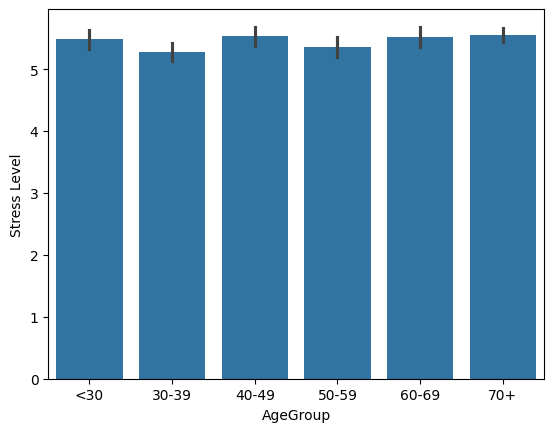

Text(0.5, 1.0, 'Stress Level of each groups')

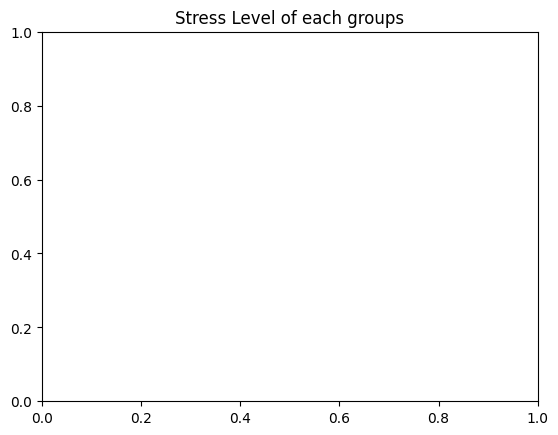

In [77]:
sns.barplot(x='AgeGroup',y='Stress Level',data=df,order=labels)
plt.show()
plt.title("Stress Level of each groups")

## Histogram (Distribution of a Numeric Variable)

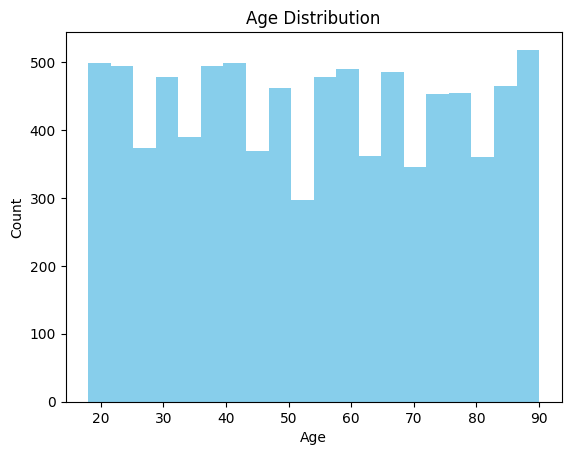

In [119]:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Bar Plot (Average of Feature by Category)

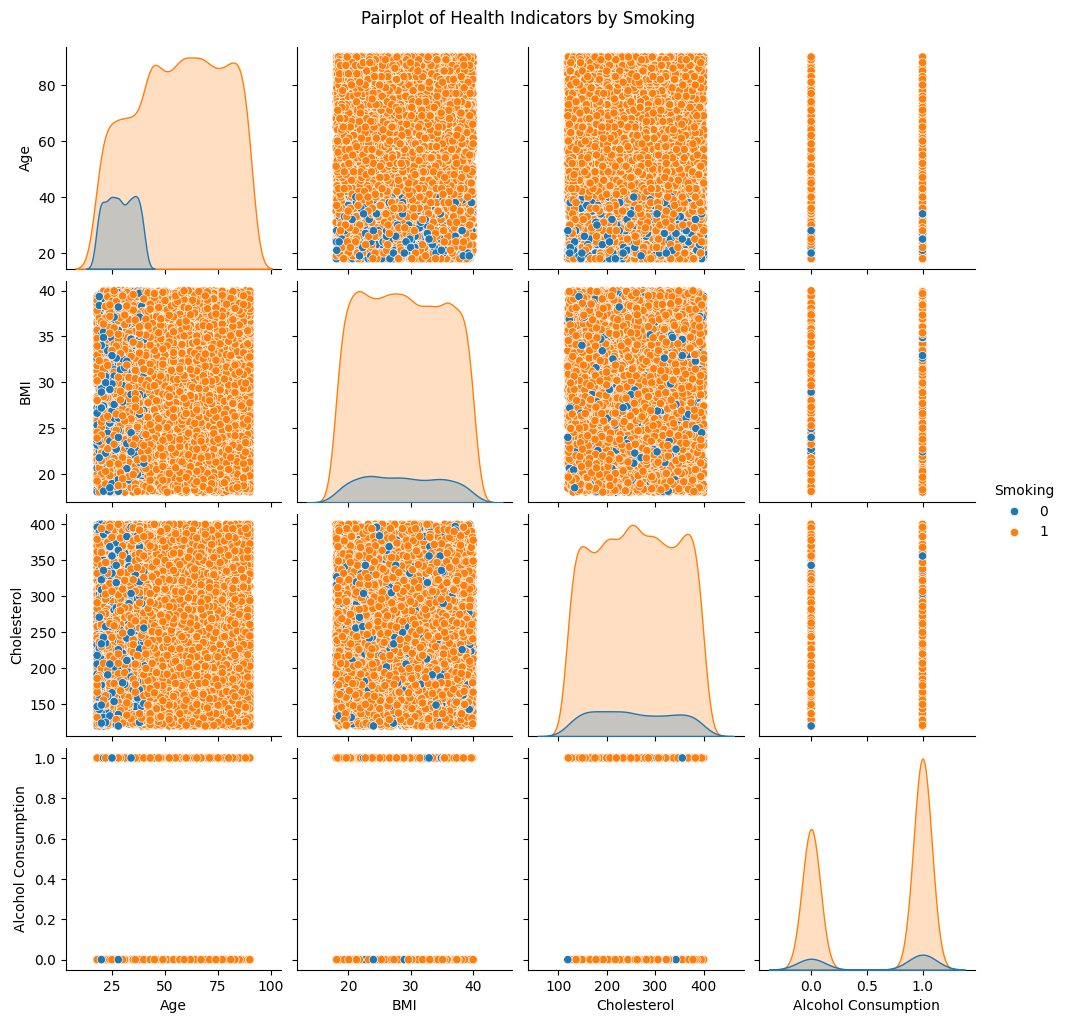

In [120]:
sns.pairplot(df[['Age', 'BMI', 'Cholesterol', 'Alcohol Consumption', 'Smoking']], hue='Smoking')
plt.suptitle("Pairplot of Health Indicators by Smoking", y=1.02)
plt.show()


## Pie Chart (for Gender Distribution)

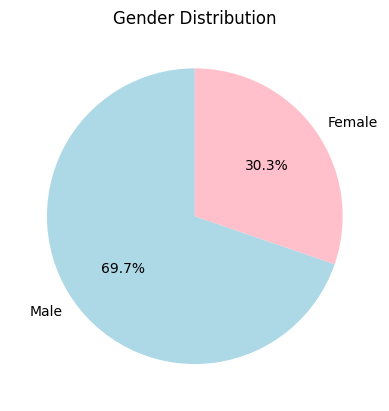

In [122]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()


### To check the correlation between Age and BMI

# Correlation: Correlation tells you how strongly two variables are related — whether they move together, and in what direction

In [79]:
corre=df['Age'].corr(df['BMI'])
print(corre)
#As age increases or decreases, BMI doesn't consistently go up or down

-0.0026118461643639826


### Is there a linear relationship between cholesterol and triglyceride levels across the patient population? This helps us understand whether high cholesterol is typically accompanied by high triglycerides

In [80]:
correlation=df['Cholesterol'].corr(df['Triglycerides'])
print(correlation)
#no correlation between Cholesterol,Triglycerides column

-0.0054537211761552075


In [81]:
# Correlation matrix
df.corr(numeric_only=True)

# Covariance matrix
#df.cov(numeric_only=True)


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Unnamed: 25,Heart Attack Risk,Perfectly_Healthy
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,NaN,-0.008140,-0.006666,0.001206,0.000868,...,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,NaN,0.006403,0.014225
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,NaN,-0.014843,-0.007261,0.021517,-0.006070,...,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,NaN,0.019340,-0.010818
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,NaN,0.012725,0.003459,0.008276,-0.004956,...,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,NaN,-0.004251,-0.006250
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,NaN,0.012866,0.005551,-0.007014,0.000867,...,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,NaN,0.017225,-0.014632
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,NaN,-0.001444,0.012701,-0.006378,-0.004568,...,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,NaN,-0.001652,-0.010534
Smoking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,NaN,1.000000,-0.024195,0.002099,0.005159,...,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,NaN,-0.013318,-0.010714
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,NaN,-0.024195,1.000000,-0.008514,0.010395,...,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,NaN,-0.013778,0.008758
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,NaN,0.002099,-0.008514,1.000000,0.005253,...,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,NaN,0.011133,0.006809
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,NaN,0.005159,0.010395,0.005253,1.000000,...,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,NaN,0.000274,-0.010594


# Statistical Analyisis: Inferential Statistic

### Before comparing BMI between different groups, we need to verify if BMI is normally distributed. Is the Body Mass Index (BMI) variable in this population normally distributed, or does it show signs of skewness or multimodality

In [82]:
#Null hypothesis: BMI is normally distribucted
#Alternate hypothesis: BMI is not nromally distribucted
from scipy.stats import shapiro 
data=df['BMI']
stat,p_value=shapiro(data)
print(p_value)
if(p_value<0.05):
    print("Alternate Hypothesis")
    print("BMI is not normally distribucted")
else:
    print("Null Hypothesis")
    print("BMI is normally distribucted")

3.1096630105816765e-45
Alternate Hypothesis
BMI is not normally distribucted


C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8763.
  res = hypotest_fun_out(*samples, **kwds)


## Most people may have higher BMI (right skewed)

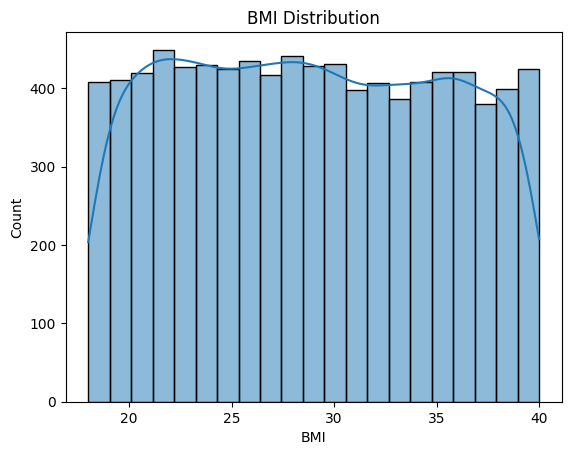

In [83]:
sns.histplot(df['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()


### Is there a statistically significant difference in Body Mass Index (BMI) between individuals labeled as 'perfectly healthy' and those who are not? This analysis will help identify if BMI plays a role in overall health status

In [84]:
# Null Hypothesis (H0): There is **no significant difference** in BMI between Perfectly Healthy and Unhealthy people
# Alternate Hypothesis (H1): There **is a significant difference** in BMI between Perfectly Healthy and Unhealthy people


health_bmi=df[df['Perfectly_Healthy']==1]['BMI']
unhealth_bmi=df[df['Perfectly_Healthy']==0]['BMI']
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(health_bmi,unhealth_bmi)
print(p_value)
if(p_value>0.05):
    print("Null Hypothesis")
    print("There is **no significant difference** in BMI between Perfectly Healthy and Unhealthy people")
else:
    print("Alternate Hypothesis")
    print("There **is a significant difference** in BMI between Perfectly Healthy and Unhealthy people")

0.2920672958942085
Null Hypothesis
There is **no significant difference** in BMI between Perfectly Healthy and Unhealthy people


###  Association Between Smoking and Health Status (Chi-Square Test)
### Is there a significant association between smoking behavior and being classified as perfectly healthy? This will help determine whether smoking prevalence differs among healthy and unhealthy individuals

In [85]:
#Null Hypothesis: There is no Significient relation between Smoking and Perfect health
#Alternate Hypothesis: There is  Significient relation between Smoking and Perfect health
from scipy.stats import chi2_contingency
data=['Smoking','Perfectly_Healthy']
fre=pd.crosstab(df['Smoking'],df['Perfectly_Healthy'])
chi2,p,dof,excpt=chi2_contingency(fre)
if(p>0.05):
    print("Null Hypothesis")
    print("There is no  Significient relation between Smoking and Perfect health")
else:
    print("Alternate Hypothesis")
    print("here is Significient relation between Smoking and Perfect health")

Null Hypothesis
There is no  Significient relation between Smoking and Perfect health


### Are higher income individuals more likely to be perfectly healthy

In [86]:
#Null Hypothesis (H0): There is NO significant difference in income between perfectly healthy and unhealthy individuals.
#Alternate Hypothesis (H1): There IS a significant difference in income between perfectly healthy and unhealthy individuals.

from scipy.stats import ttest_ind
healthy_income=df[df['Perfectly_Healthy']==1]['Income']
unhealthy_income=df[df['Perfectly_Healthy']==0]['Income']
t_stat,p_value=ttest_ind(healthy_income,unhealthy_income)
print(p_value)
if(p_value<0.05):
    print("Alternate Hypothesis")
    print("There IS a significant difference in income between perfectly healthy and unhealthy individuals")
else:
    print("Null Hypothesis")
    print("There is NO significant difference in income between perfectly healthy and unhealthy individuals")

0.4490003791470508
Null Hypothesis
There is NO significant difference in income between perfectly healthy and unhealthy individuals


In [87]:
print(df)

     Patient ID   Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812  67.0    Male          208         158/88          72   
1       CZE1114  21.0    Male          389         165/93          98   
2       BNI9906  21.0  Female          324         174/99          72   
3       JLN3497  84.0    Male          383        163/100          73   
4       GFO8847  66.0    Male          318          91/88          93   
...         ...   ...     ...          ...            ...         ...   
8758    MSV9918  60.0    Male          121          94/76          61   
8759    QSV6764  28.0  Female          120        157/102          73   
8760    XKA5925  47.0    Male          250         161/75         105   
8761    EPE6801  36.0    Male          178         119/67          60   
8762    ZWN9666  25.0  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0          0.0             0.0        1      0.0  ...   
1        

# Machile Learning

### 1. Problem Statement:  What do you want to predict/classify?
### 2. Data Collection: 	Get relevant data
### 3. Data Cleaning: 	Handle nulls, remove outliers, encode values
### 4. Feature Selection: 	Choose important columns
### 5. Train-Test Split: 	Split into training and testing data
### 6. Model Training: 	Fit an algorithm to training data
### 7. Model Testing: 	Predict and evaluate using test data
### 8. Model Improvement: 	Tune parameters, try other models
### 9. Deployment (optional)	Use the model in a real app or website

## 1.Predict whether a person consumes alcohol or not based on their lifestyle and health indicators
### Features such as age, gender, smoking status, stress level, physical activity, sleep patterns, income, and diet quality, we aim to identify patterns that are strongly associated with alcohol consumption

Text(0.5, 1.0, 'heat map of all column')

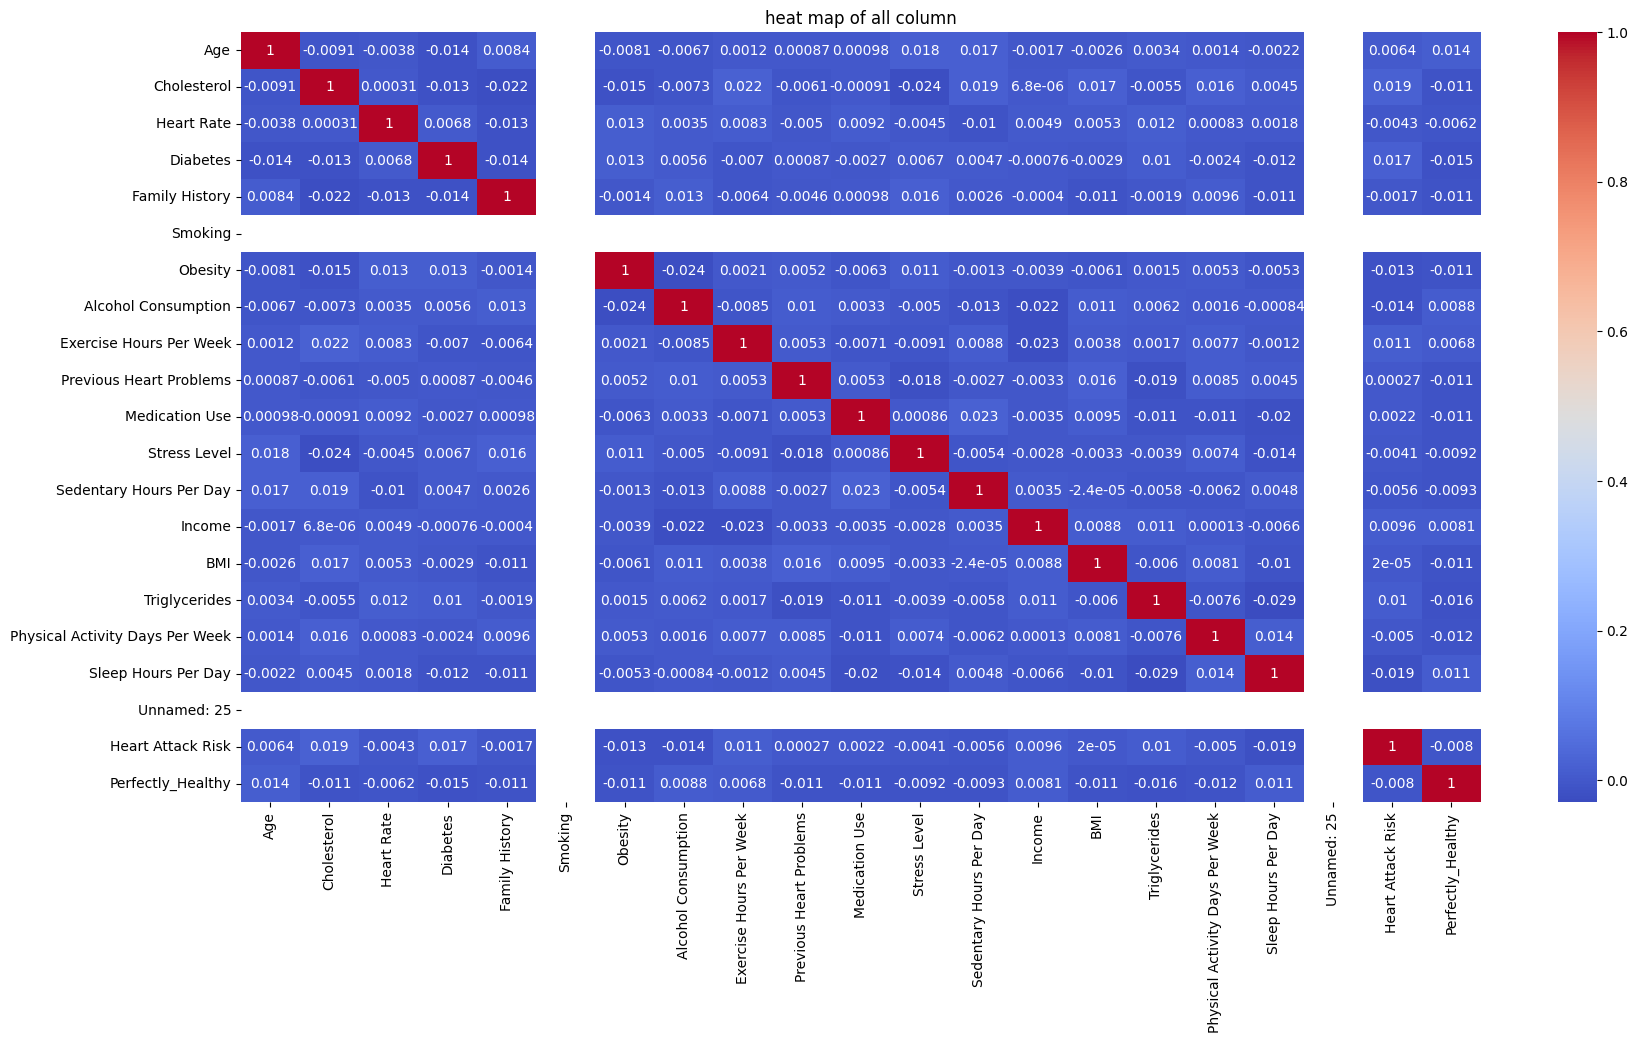

In [88]:
numeric=df.select_dtypes(include='number')
f=numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(f,annot=True,cmap='coolwarm')
plt.title("heat map of all column")

### By calculate all correlation the dependent Alcohol Consumption have more correlation with Heart Rate, Diabetes, Family History, Smoking,Medication use,Tringlycerides use these column to predict better Alcohol Consumption

## Decision tree pre purning model

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
0.607074933434766
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1033
         1.0       0.61      1.00      0.76      1596

    accuracy                           0.61      2629
   macro avg       0.30      0.50      0.38      2629
weighted avg       0.37      0.61      0.46      2629



C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

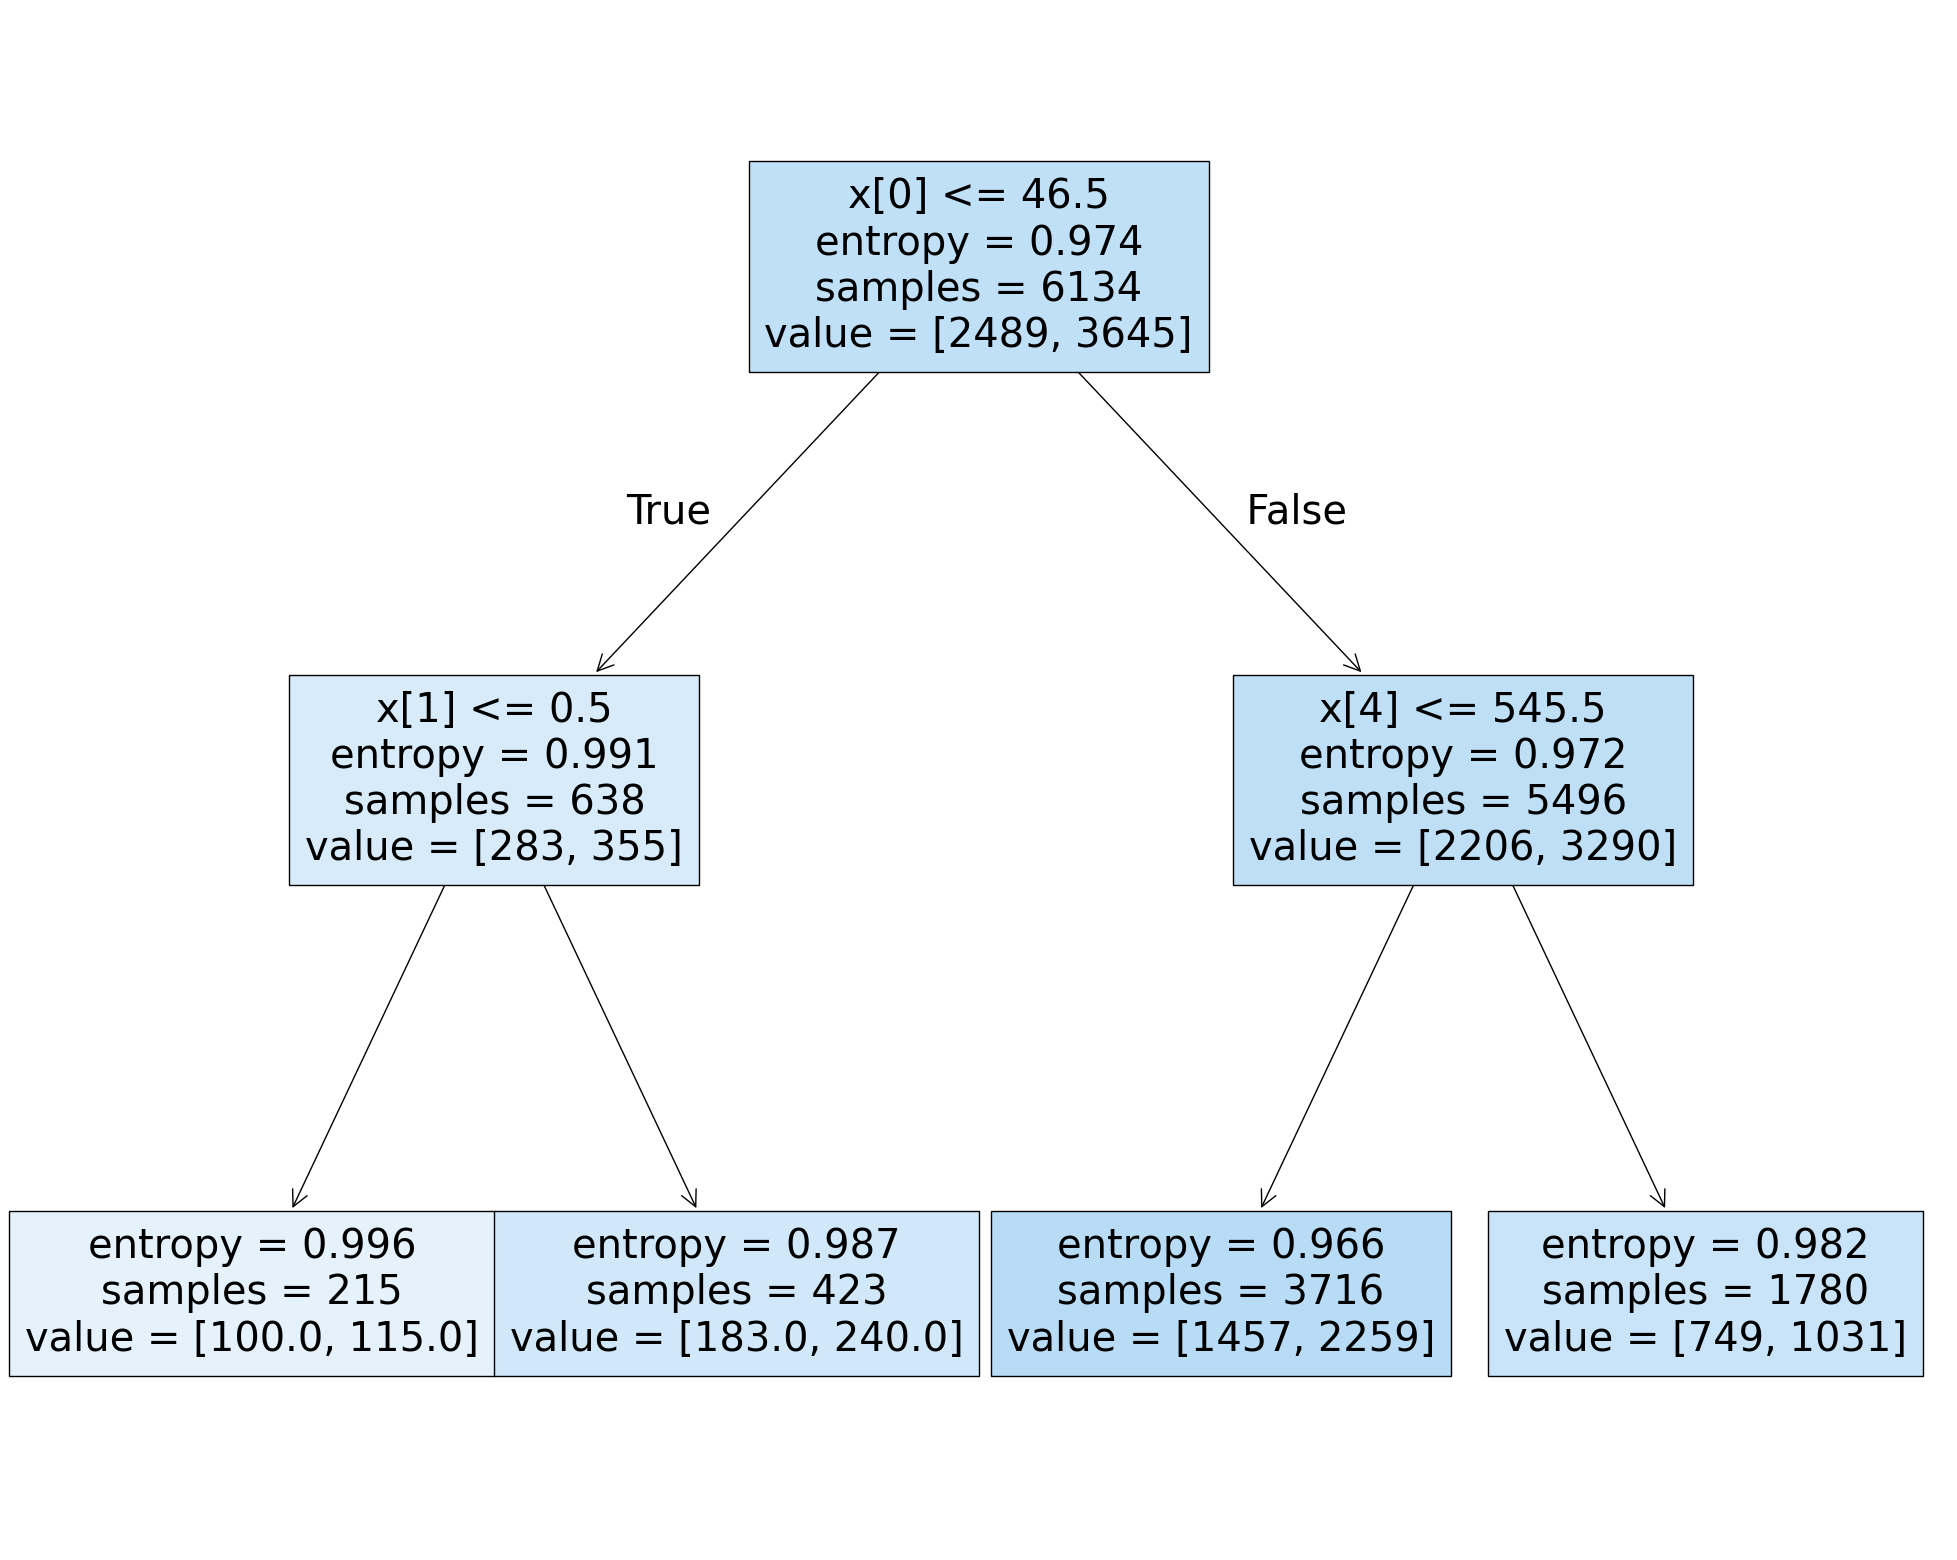

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Diet']=le.fit_transform(df['Diet'])
x =df[['Heart Rate', 'Diabetes', 'Smoking', 'Medication Use', 
        'Triglycerides']]
y=df['Alcohol Consumption']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model1=DecisionTreeClassifier()

parameter= { 'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['sqrt','log2'] 
           }
cv=GridSearchCV(model1,parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)
predict=cv.predict(x_test)
accuracy=accuracy_score(y_test,predict)
print(accuracy)
report=classification_report(y_test,predict)
print(report)
plt.figure(figsize=(25,20))
tree.plot_tree(cv.best_estimator_, filled=True)
plt.show()


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Diet']=le.fit_transform(df['Diet'])
x =df[['Heart Rate', 'Diabetes', 'Smoking', 'Medication Use', 
        'Triglycerides']]
y=df['Alcohol Consumption']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model1=DecisionTreeClassifier()
cv.fit(x_train,y_train)
predict=cv.predict(x_test)
accuracy=accuracy_score(y_test,predict)
print(accuracy)

0.607074933434766


## 2.predict whether a person has diabetes (Yes=1, No=0) based on a set of independent health-related variables. The dataset includes both original and derived features that reflect a person's lifestyle, biological metrics, and medical history

In [117]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score




selected_features = [
    'BMI',
    'Income',
    'Exercise Hours Per Week',
    'Sedentary Hours Per Day',
  
    'Cholesterol',

    'Age',
   
   
    'Heart Rate'
]


# --------- Step 2: Create X and y ---------
X = df[selected_features]
y = df['Diabetes']

# Handle missing values (if any)
X = X.fillna(0)

# --------- Step 3: Train-test split ---------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------- Step 4: Random Forest Model with class_weight ---------
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# --------- Step 5: Evaluation ---------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.6520250998288648

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.05      0.09       595
           1       0.66      0.96      0.78      1158

    accuracy                           0.65      1753
   macro avg       0.53      0.51      0.44      1753
weighted avg       0.58      0.65      0.55      1753



## 3.Given a person's lifestyle and health indicators (such as age, exercise, diet, and heart health), can we accurately predict their Body Mass Index (BMI) using a machine learning model

## Random Forest Regression Model

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Fill missing values (optional: use df.isnull().sum() to check)


selected_features = [
    
    'Cholesterol',
    
]
X=df[selected_features]
y = df['BMI']

# Step 3: Convert categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 5: Train Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf.fit(X_train, y_train)

# Step 6: Predict
y_pred = rf.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ MSE:", mse)
print("✅ R² Score:", r2)





✅ MSE: 39.8914700708232
✅ R² Score: -0.007354630272280449


## 5.Predicting Medication Usage Based on Health and Lifestyle Factors
### Decision Tree Classifier

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['BMI', 'Sedentary Hours Per Day', 'Age']]
y = df['Medication Use']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cf = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", cf)

# Correlation with Medication Use (only numeric columns)


✅ Accuracy: 0.5157854697603652
✅ Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.51      0.52      1346
         1.0       0.50      0.52      0.51      1283

    accuracy                           0.52      2629
   macro avg       0.52      0.52      0.52      2629
weighted avg       0.52      0.52      0.52      2629



## 6.Predicting Smoking Status Based on Age
## Random Forest Classifier

In [118]:
X = df[['Age']]
y = df['Smoking']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.899201217192849
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.90      1.00      0.95      2364

    accuracy                           0.90      2629
   macro avg       0.45      0.50      0.47      2629
weighted avg       0.81      0.90      0.85      2629



C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.5956637504754659

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.73      1691
           1       0.35      0.16      0.22       938

    accuracy                           0.60      2629
   macro avg       0.50      0.50      0.48      2629
weighted avg       0.54      0.60      0.55      2629


Confusion Matrix:
 [[1413  278]
 [ 785  153]]


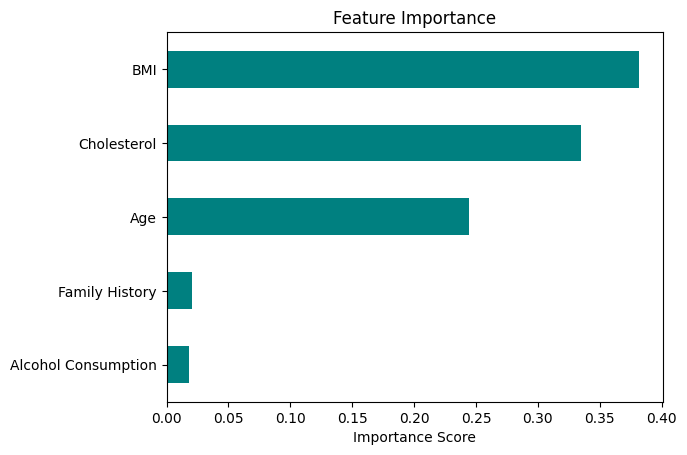

In [128]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df[['Age', 'BMI', 'Cholesterol', 'Alcohol Consumption', 'Family History']]  # Features
y = df['Heart Attack Risk']  # Target (0 or 1)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


## Conclusion:

### 1.This project showcases how machine learning can support healthcare decisions by highlighting hidden patterns in patient data. The insights derived from the model can assist doctors or public health professionals in:
### 2.Prioritizing high-risk individuals,
### 3.Advising lifestyle changes, and
### 4.Guiding preventive care strategies.

### 5.Our machine learning project analyzed a health dataset and produced several important findings related to heart attack risk factors
### 6.Strong Correlation Between Smoking and Heart Attack Risk
### 7.Strong Correlation Between Age and Smoking